<a href="https://colab.research.google.com/github/soulayman-al-abdallah/Data-Science-Projects/blob/main/M06_Mask_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##Mask Detection

---
We need to build a model that can detect whether a person is wearing a mask or not.

##Getting the Data

We start by getting the data. The data that we want is on kaggle and you can access it through this link: https://www.kaggle.com/omkargurav/face-mask-dataset 

In [1]:
from google.colab import files
files.upload()  #this will prompt you to upload the kaggle.json

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"raeddb","key":"6efb7400dd67bb8e20f23520258c4605"}'}

In [2]:
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!ls ~/.kaggle
!chmod 600 /root/.kaggle/kaggle.json  # set permission

kaggle.json


In [3]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 91% 149M/163M [00:01<00:00, 103MB/s]
100% 163M/163M [00:01<00:00, 123MB/s]


In [ ]:
!unzip "/content/face-mask-dataset.zip" 



---



##Importing the Libraries

In [6]:
import os
import shutil
import random
import numpy as np
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2

We can see in the unzipped folder that the data is located in 2 folders: with_mask and without_mask. 

What we need to do now, is to create a hierarchy of folders that would help us specify the training, validation, and testing data. 

In order to do this we have to use the **os** library that would help us creating folders, and moving images from a folder to another.

The initial dataset contains a lot of images belonging to the 2 classes, what we will do is randomly sample from this dataset so that we reduce the training and the tuning time. 

We need to have in our final directories the following:
* Training: 500 images "with_mask", and 500 images "without_mask"
* Validation: 100 images "with_mask", and 100 images "without_mask"
* Testing: 50 images "with_mask", and 50 images "without_mask"

In [7]:
#creating 3 new subdirectories in the root directory called "data"

root_dir = "/content/data"

class_names = ['with_mask', 'without_mask']

os.mkdir(os.path.join(root_dir, 'train'))
os.mkdir(os.path.join(root_dir, 'eval'))
os.mkdir(os.path.join(root_dir, 'test'))

In [8]:
for c in class_names:
  #Creating "with_mask" and "without_mask" folder in each of the 3 subdirectories 
  os.mkdir(os.path.join(root_dir, 'test', c))
  os.mkdir(os.path.join(root_dir, 'train', c))
  os.mkdir(os.path.join(root_dir, 'eval', c))

In [9]:
#For each class, take the images, and select randomly 500 samples for training and 100 for evaluation, and 50 for testing
for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_images = random.sample(images, 500)
  for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'train', c, image)
      shutil.move(source_path, target_path)
      # I can use also shutil.copyfile(fileDir+name, tarDir+name) but should remove copied file to avoid copying them again

for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]
  selected_images = random.sample(images, 100)
  for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'eval', c, image)
      shutil.move(source_path, target_path)

for c in class_names:
  images = [x for x in os.listdir(os.path.join(root_dir, c))]              
  selected_images = random.sample(images, 50)
  for image in selected_images:
      source_path = os.path.join(root_dir, c, image)
      target_path = os.path.join(root_dir, 'test', c, image)
      shutil.move(source_path, target_path)



---



##Inspecting the Dataset

In [10]:
training_path = "/content/data/train"
validation_path = "/content/data/eval"
testing_path = "/content/data/test"

In [11]:
#counting the files in each folder to make sure we're correct before proceeding

with_mask_training = len(os.listdir(os.path.join(training_path, "with_mask")))
without_mask_training = len(os.listdir(os.path.join(training_path, "without_mask")))

print(f"We have {with_mask_training} images with mask and {without_mask_training} images without mask in our training set")

We have 500 images with mask and 500 images without mask in our training set


In [12]:
with_mask_val = len(os.listdir(os.path.join(validation_path, "with_mask")))
without_mask_val = len(os.listdir(os.path.join(validation_path, "without_mask")))

print(f"We have {with_mask_val} images with mask and {without_mask_val} images without mask in our Validation set")

We have 100 images with mask and 100 images without mask in our Validation set


In [13]:
with_mask_testing = len(os.listdir(os.path.join(testing_path, "with_mask")))
without_mask_testing = len(os.listdir(os.path.join(testing_path, "without_mask")))

print(f"We have {with_mask_testing} images with mask and {without_mask_testing} images without mask in our testing set")

We have 50 images with mask and 50 images without mask in our testing set


Write a code that shows 5 random images for people with mask from your training set. 

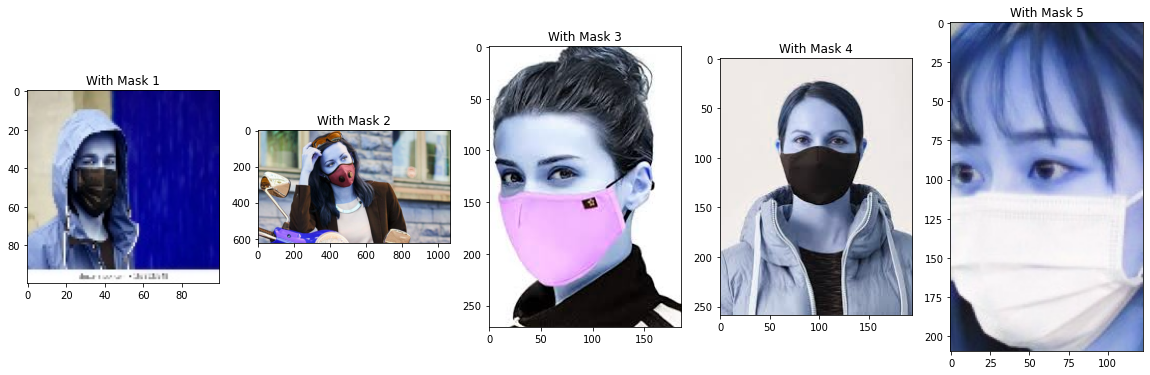

In [19]:
#showing some samples "with mask" from the training folder
all_images = os.listdir(os.path.join(training_path,"with_mask"))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(20, 7))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(training_path, "with_mask", image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1,5, index+1)
  plt.imshow(img)
  plt.title(f"With Mask {index+1}")

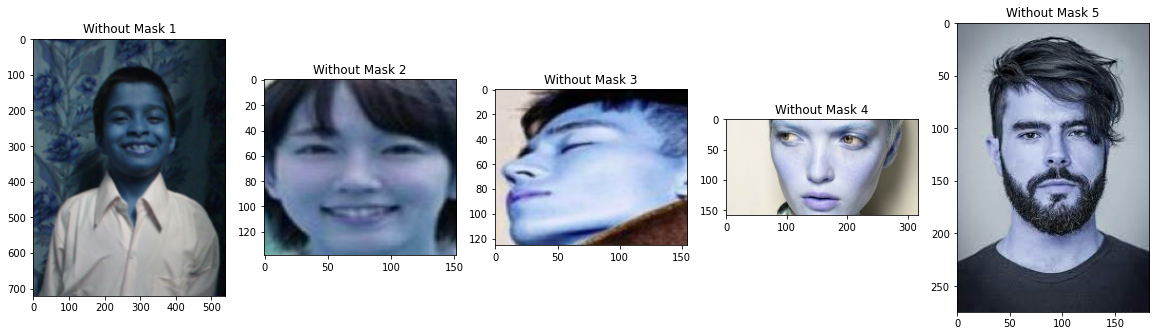

In [20]:
#showing some samples "without mask" from the training folder

all_images = os.listdir(os.path.join(training_path,"without_mask"))
display_images = random.sample(all_images, 5)

fig = plt.figure(figsize=(20, 7))

for index, image_name in enumerate(display_images):
  img_path = os.path.join(training_path, "without_mask", image_name)
  img = cv2.imread(img_path)
  fig.add_subplot(1,5, index+1)
  plt.imshow(img)
  plt.title(f"Without Mask {index+1}")



---



##Modeling

In [39]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', padding='same', input_shape=(128, 128, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 128, 128, 16)      448       
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 64, 64, 16)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 64, 64, 32)        4640      
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 32, 32, 32)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 16, 16, 64)      

We need to train the model on the training data and evaluate it on the validation data. 

**N.B:** We save the model training history in a variable to plot later the learning curve.

In [40]:
from keras_preprocessing.image import ImageDataGenerator

#Using the same instance, we create a generator for each set of data to fit the model on it and then validate it
datagen = ImageDataGenerator(rescale = 1./255)

train_generator = datagen.flow_from_directory(
	training_path,
	target_size=(128, 128),
  classes = ['without_mask', 'with_mask'],
	class_mode='binary',
)

val_generator = datagen.flow_from_directory(
	validation_path,
	target_size=(128, 128),
  classes = ['without_mask', 'with_mask'],
	class_mode='binary',
)

Found 1000 images belonging to 2 classes.
Found 200 images belonging to 2 classes.


In [41]:
model.compile(loss = 'binary_crossentropy', optimizer='adam', metrics=['accuracy'])
history = model.fit(train_generator, epochs=10, validation_data = val_generator, verbose = 1)

Epoch 1/10
32/32 [==============================] - 20s 593ms/step - loss: 0.6175 - accuracy: 0.6380 - val_loss: 0.3997 - val_accuracy: 0.8450
Epoch 2/10
32/32 [==============================] - 19s 574ms/step - loss: 0.3925 - accuracy: 0.8470 - val_loss: 0.3335 - val_accuracy: 0.8800
Epoch 3/10
32/32 [==============================] - 19s 586ms/step - loss: 0.2713 - accuracy: 0.8950 - val_loss: 0.3395 - val_accuracy: 0.8550
Epoch 4/10
32/32 [==============================] - 19s 589ms/step - loss: 0.2486 - accuracy: 0.9150 - val_loss: 0.3236 - val_accuracy: 0.8600
Epoch 5/10
32/32 [==============================] - 19s 583ms/step - loss: 0.2159 - accuracy: 0.9190 - val_loss: 0.2856 - val_accuracy: 0.8950
Epoch 6/10
32/32 [==============================] - 19s 579ms/step - loss: 0.2138 - accuracy: 0.9180 - val_loss: 0.2848 - val_accuracy: 0.8950
Epoch 7/10
32/32 [==============================] - 19s 581ms/step - loss: 0.1449 - accuracy: 0.9480 - val_loss: 0.4686 - val_accuracy: 0.8150

▶ We should plot the accuracy curve and see if your model is overfit.

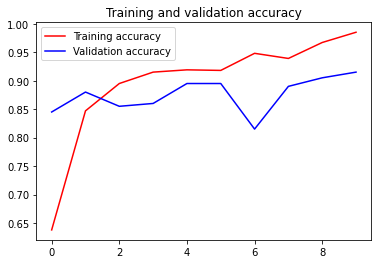

<Figure size 432x288 with 0 Axes>

In [42]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

The model is not that overfit



---



##Evaluate the model


Now we will evaluate the model  on the testing set that we kept aside since the beginning.

In [43]:
test_generator = datagen.flow_from_directory(
	testing_path,
	target_size=(128, 128),
  classes = ['without_mask', 'with_mask'],
	class_mode='binary',
  shuffle = False,
)

Found 100 images belonging to 2 classes.


In [44]:
model.evaluate(test_generator)

4/4 [==============================] - 1s 176ms/step - loss: 0.1881 - accuracy: 0.9300


[0.1880890280008316, 0.9300000071525574]

Now we want to visualize the confusion matrix in order to see how much our classifier is good in predicting different classes.

In [46]:
predictions = model.predict(test_generator)
predictions = predictions>0.5
predictions = predictions.astype(int)

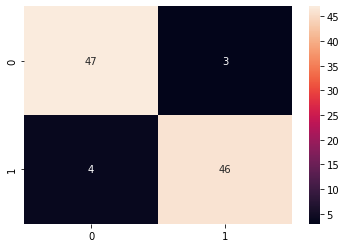

In [47]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
import seaborn as sns
cm = confusion_matrix(test_generator.classes, predictions)
sns.heatmap(cm, annot=True)

The model performs well, but it recognizes the class 0 better than it recognizes class 1.



---



##Error Analysis

Now we need to see for each of the images that we have in our testing set, what did the model predict. This helps us analyze the errors and try to think why the model predicted some things in the wrong way.

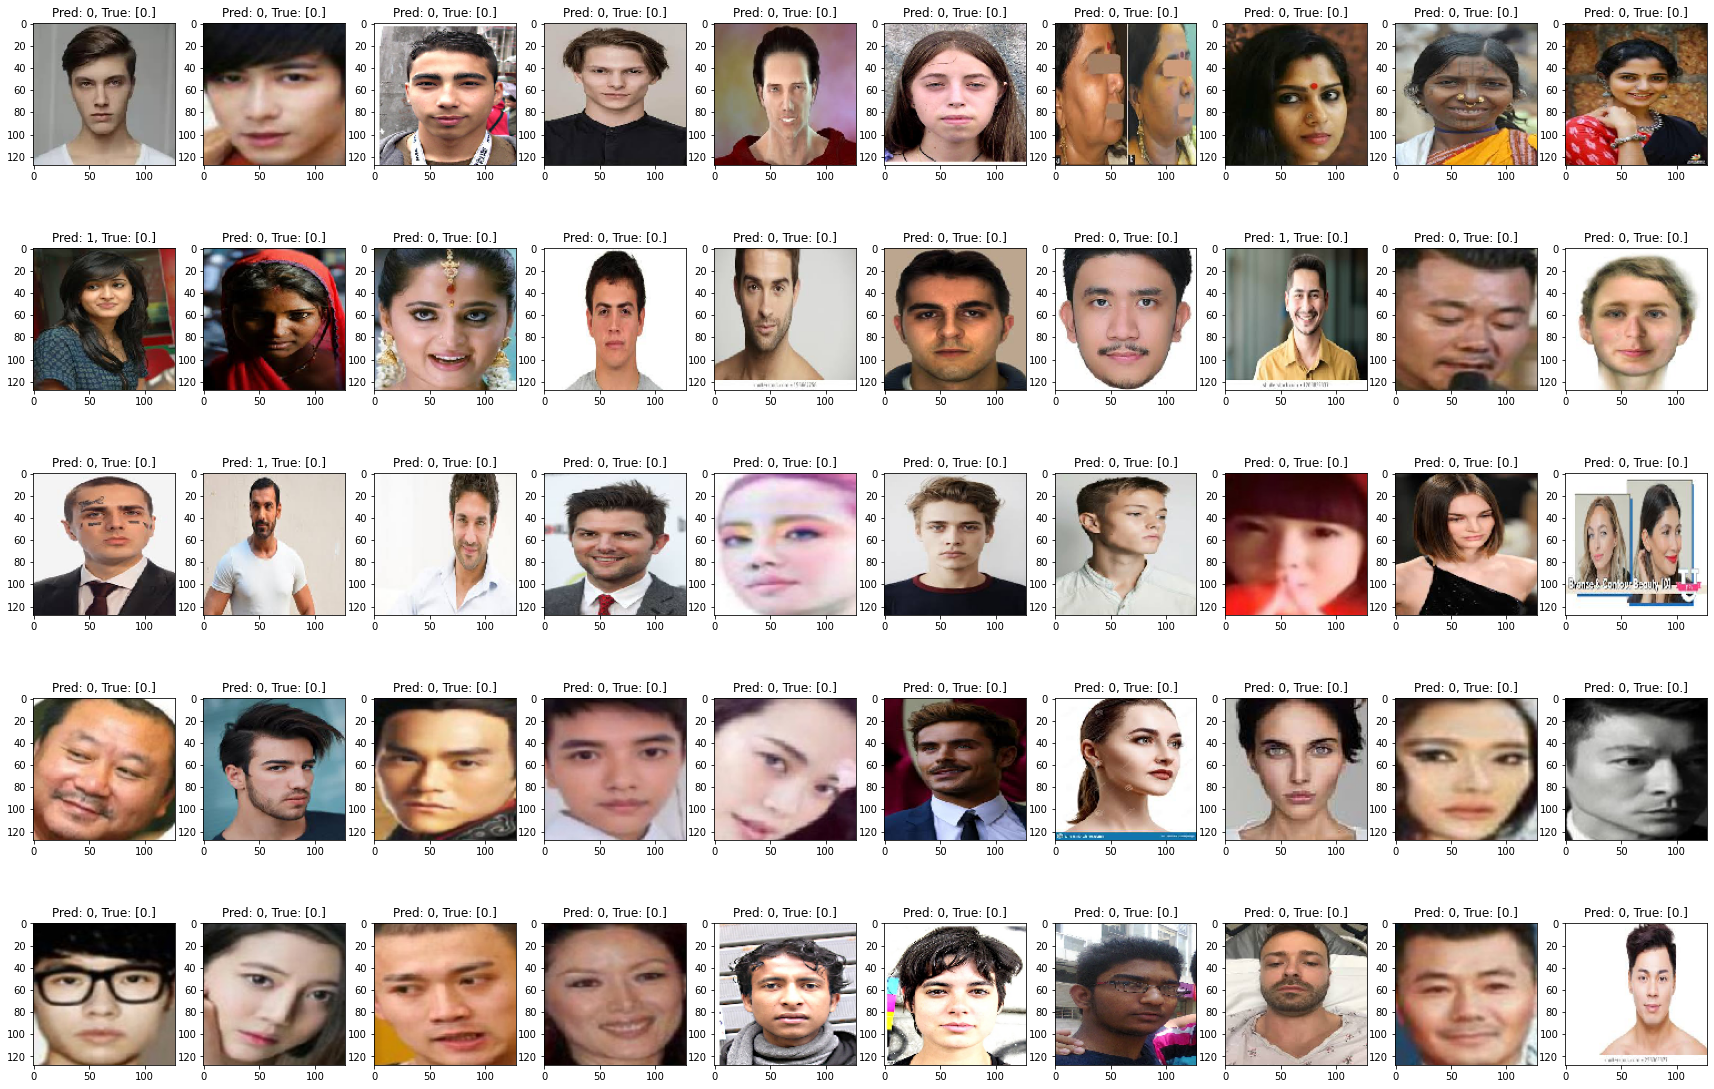

In [57]:
test_generator.reset()
test_generator.batch_size = 1
fig = plt.figure(figsize=(30, 20))
for i in range(50):
  img = test_generator.next()
  prediction = int(model.predict(img[0])>0.5)

  fig.add_subplot(5,10, i+1)
  plt.imshow(img[0][0])

  plt.title(f"Pred: {prediction}, True: {img[1]}")



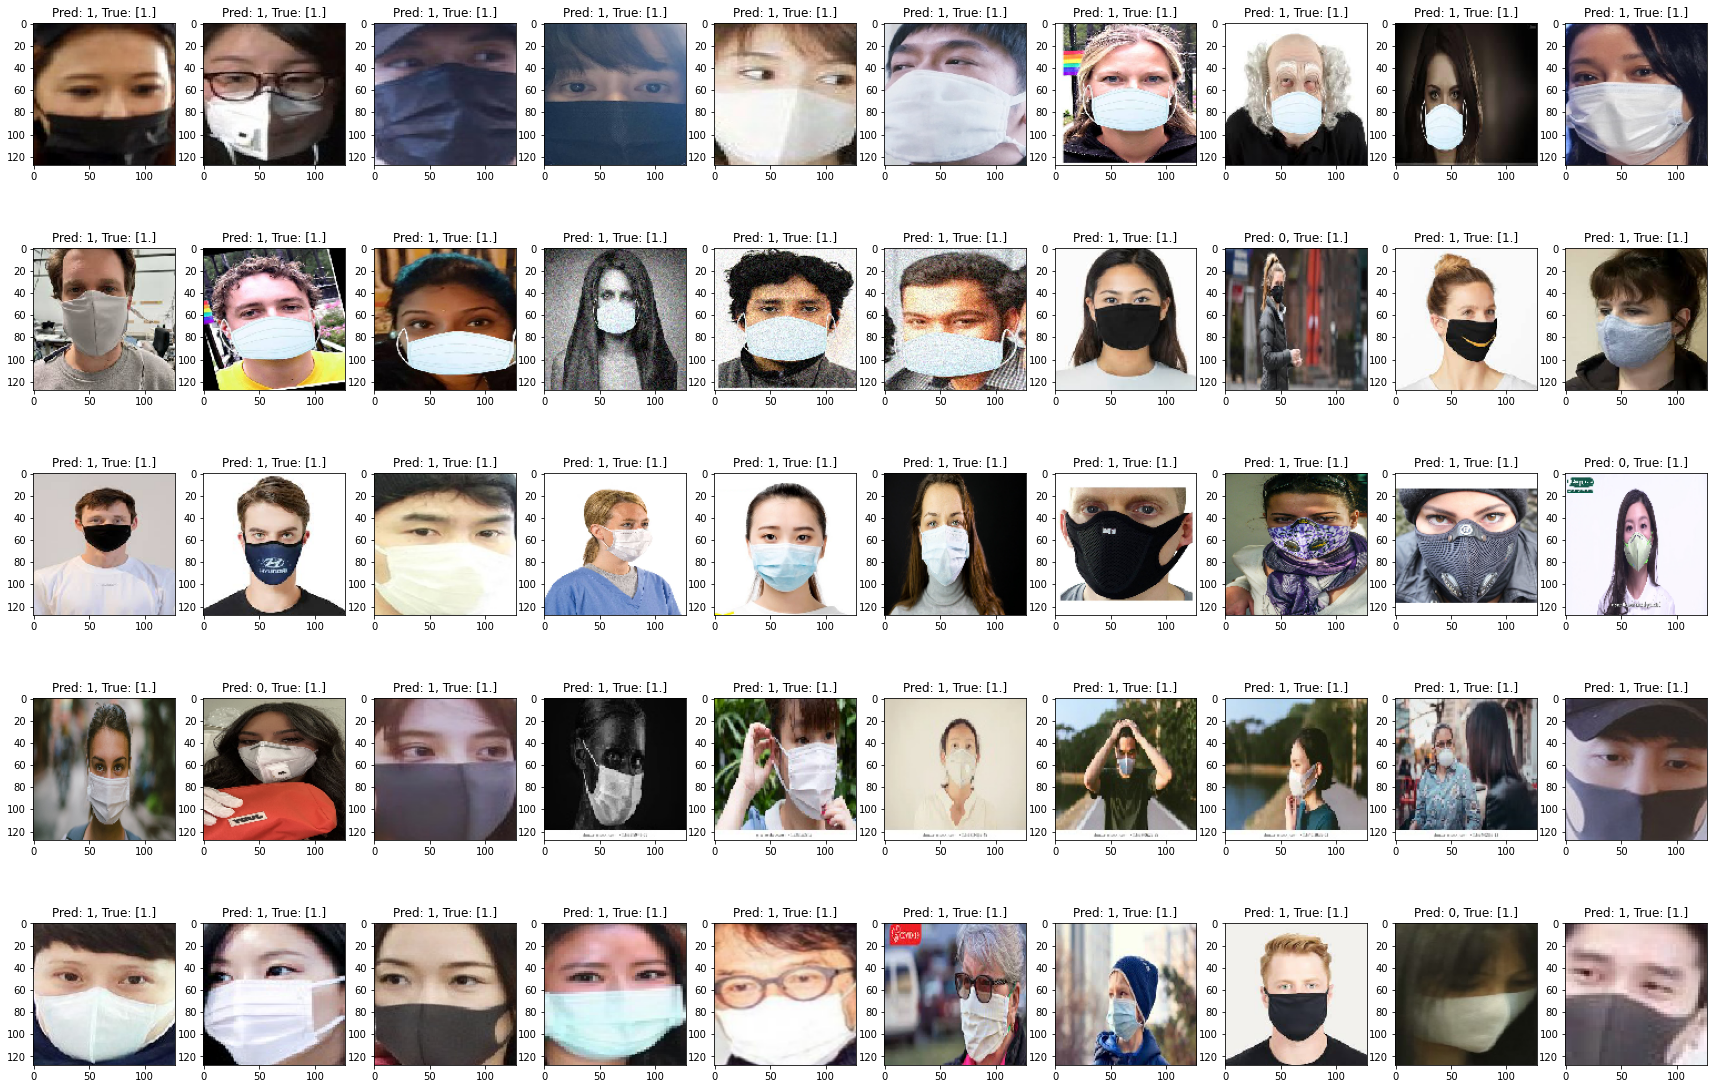

In [52]:
fig = plt.figure(figsize=(30, 20))
for i in range(50):
  img = test_generator.next()
  prediction = int(model.predict(img[0])>0.5)

  fig.add_subplot(5,10, i+1)
  plt.imshow(img[0][0])

  plt.title(f"Pred: {prediction}, True: {img[1]}")

**What can we say about some of the wrong predictions**

images shown in 5 rows (0,1,2,3,4) and 10 columns (0,1,2,3,4,5,6,7,8,9)

- **Without mask:** The image with index (2,1) was classified as 1 but the truth is 0. Maybe the model identified a wrong presence of a mask because the face of the person is kind of far from the camera, and the face area presents less than 1/8 of the full image size.
- **With mask:** The image with index (2,9) was classified as 0 but the truth is 1. Maybe the training data does not contain images stretched in an inverse way, and this is why it was not classified correctly.

**Some ways we may use in order to improve the performance of the model**

* Getting More Data
* Training for longer
* Transfer Learning



---

